<a href="https://colab.research.google.com/github/Neermita18/Kaggle_challenges/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('stroke.csv')

In [3]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

converting objects to continuous variables

In [10]:
map1= {'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3}

In [11]:
df['smoking_status']= df['smoking_status'].map(map1)

In [13]:
df['gender']= df['gender'].map({'Male':0, 'Female':1})

In [14]:
df['ever_married']= df['ever_married'].map({'No':0, 'Yes':1})

In [15]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [16]:
df['work_type']= df['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [18]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [19]:
df['Residence_type']= df['Residence_type'].map({'Urban':0, 'Rural':1})

In [20]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,51676,1.0,61.0,0,0,1,1,1,202.21,NaN,0,1
2,31112,0.0,80.0,0,1,1,0,1,105.92,32.5,0,1
3,60182,1.0,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1665,1.0,79.0,1,0,1,1,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,0,0,83.75,NaN,0,0
5106,44873,1.0,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,19723,1.0,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,37544,0.0,51.0,0,0,1,0,1,166.29,25.6,2,0


replacing NaN values

In [27]:
df['age_cat']= df['age'].apply(lambda x: 'adult' if (x<40)&(x>=18) else 'old' if x>=60 else 'child'  )

In [28]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,9046,0.0,67.0,0,1,1,0,0,228.69,36.6,2,1,old
1,51676,1.0,61.0,0,0,1,1,1,202.21,NaN,0,1,old
2,31112,0.0,80.0,0,1,1,0,1,105.92,32.5,0,1,old
3,60182,1.0,49.0,0,0,1,0,0,171.23,34.4,3,1,child
4,1665,1.0,79.0,1,0,1,1,1,174.12,24.0,0,1,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,0,0,83.75,NaN,0,0,old
5106,44873,1.0,81.0,0,0,1,1,0,125.20,40.0,0,0,old
5107,19723,1.0,35.0,0,0,1,1,1,82.99,30.6,0,0,adult
5108,37544,0.0,51.0,0,0,1,0,1,166.29,25.6,2,0,child


In [30]:
df.groupby('age_cat').mean('bmi')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
age_cat,,,,,,,,,,,,
adult,36605.420852,0.649657,29.022070,0.027397,0.001522,0.510654,0.317352,0.490868,96.033965,29.509703,1.074581,0.004566
child,36549.585950,0.553719,35.202066,0.068595,0.024793,0.583884,1.247107,0.495868,102.683380,27.967988,1.099174,0.025620
old,36378.333576,0.582122,70.904070,0.215116,0.155523,0.922238,0.615552,0.486192,121.898416,29.969339,1.169331,0.131541


In [31]:
df.groupby(["gender","ever_married","age_cat"])["bmi"].mean()

gender  ever_married  age_cat
0.0     0             adult      28.361161
                      child      22.446377
                      old        30.387879
        1             adult      30.855046
                      child      31.947016
                      old        30.041200
1.0     0             adult      28.111500
                      child      23.017137
                      old        31.033824
        1             adult      30.728966
                      child      31.557862
                      old        29.790789
Name: bmi, dtype: float64

In [41]:
df["bmi"]= df['bmi'].fillna(df.groupby(["gender","ever_married","age_cat"])["bmi"].transform('mean'))

In [49]:
df=df.drop("id", axis=1)

analysis

In [47]:
import seaborn as sns

<ipython-input-50-edcf89e96954>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-50-edcf89e96954>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-50-edcf89e96954>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-50-edcf89e96954>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-50-edcf89e96954>:4: FutureW

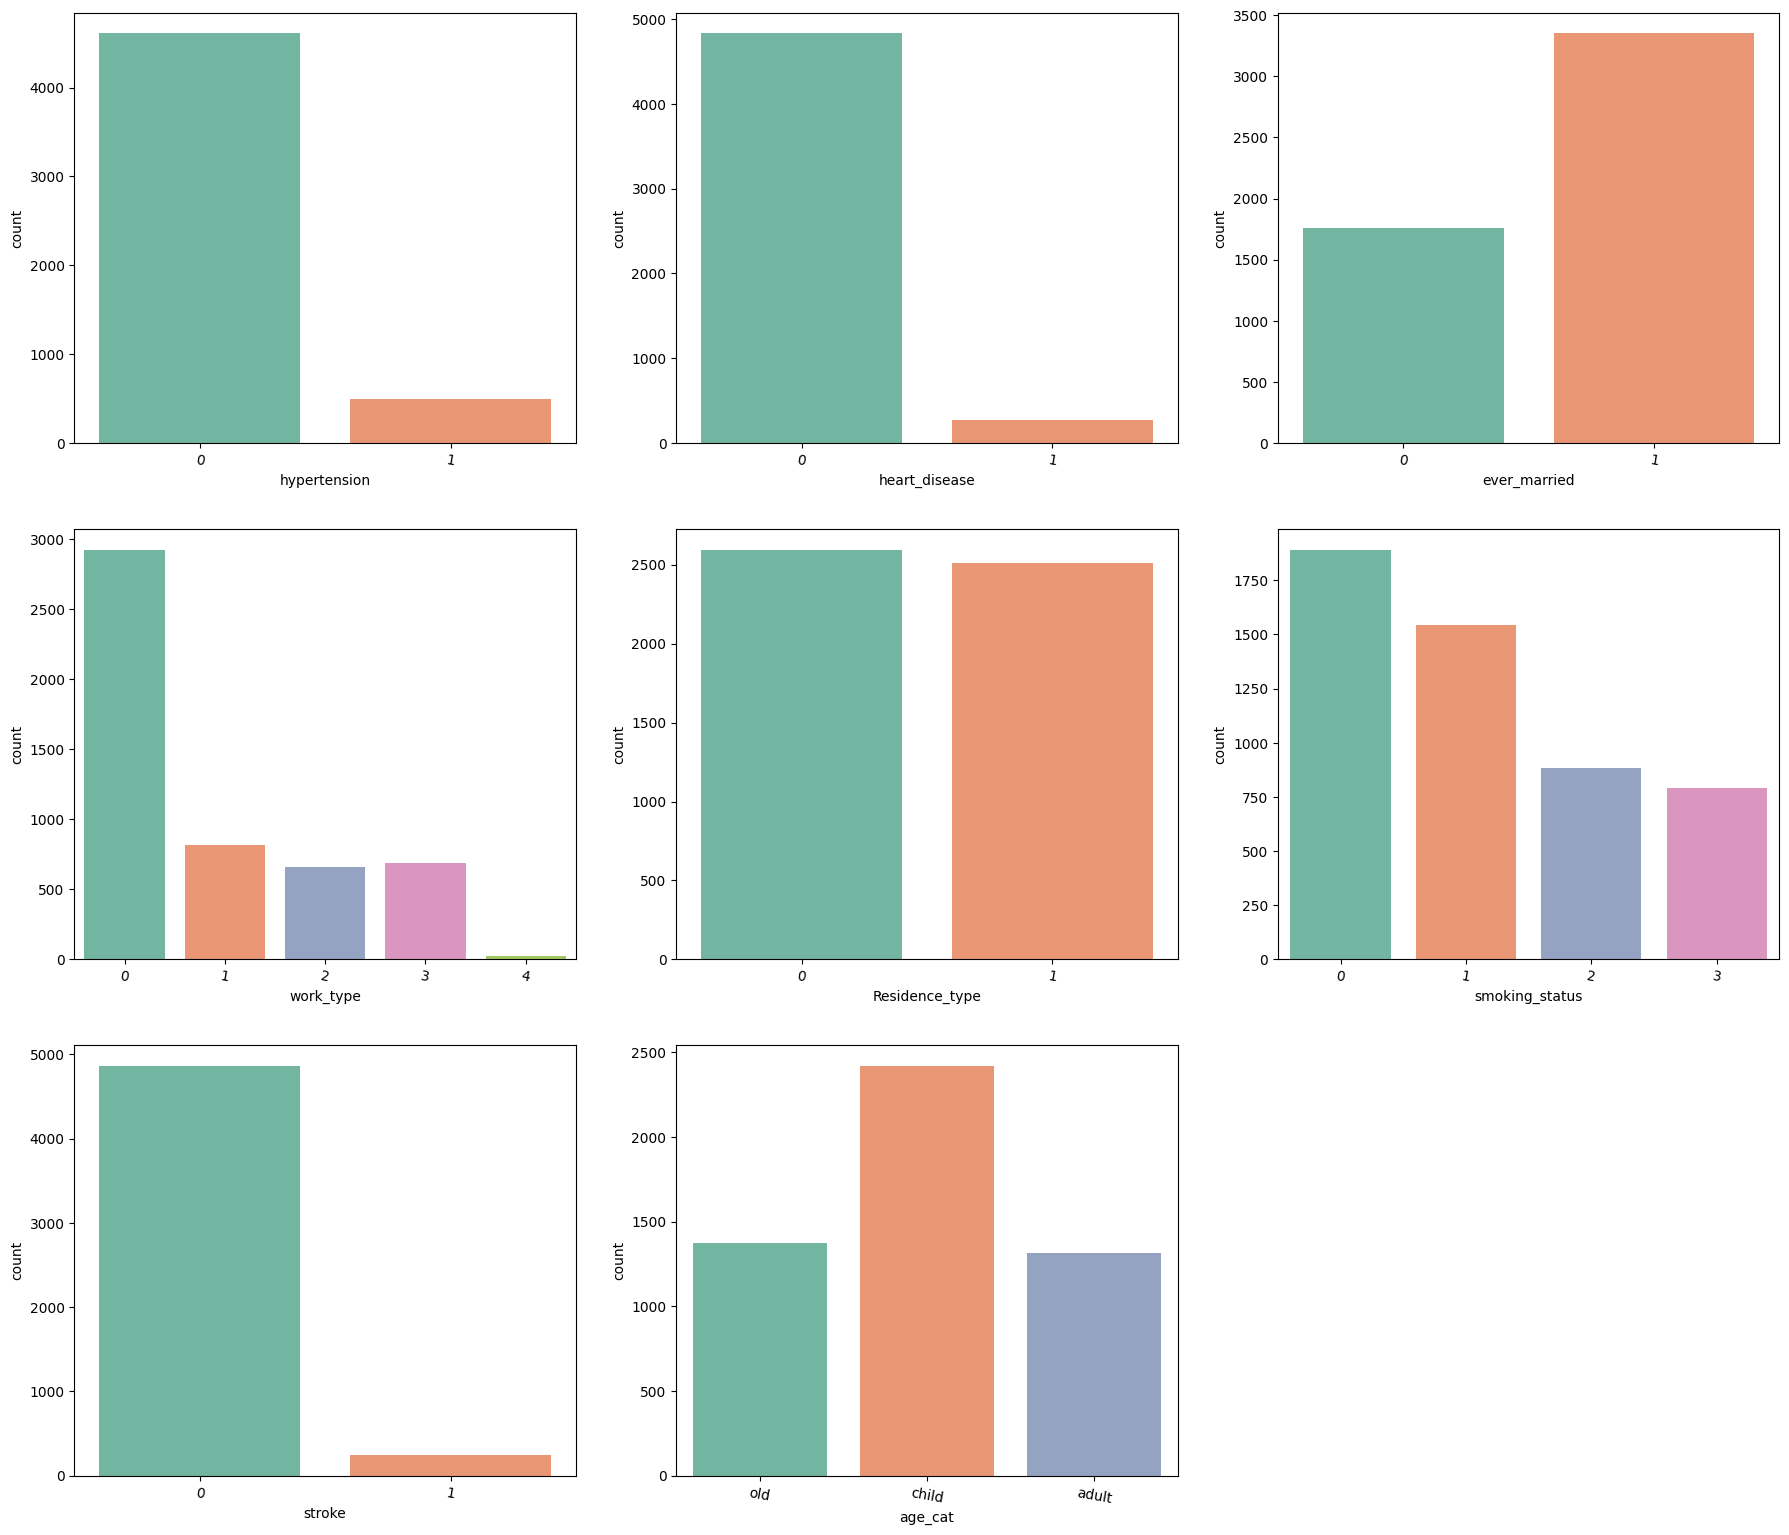

In [50]:
plt.figure(figsize=(22,19))
for i,col in enumerate(df.select_dtypes(exclude=float).columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
    plt.xticks(rotation=-10)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
 11  age_cat            5110 non-null   object 
dtypes: float64(4), int64(7), object(1)
memory usage: 479.2+ KB


<ipython-input-55-bf33ed790833>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
<ipython-input-55-bf33ed790833>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
<ipython-input-55-bf33ed790833>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
<ipython-input-55-bf33ed790833>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))


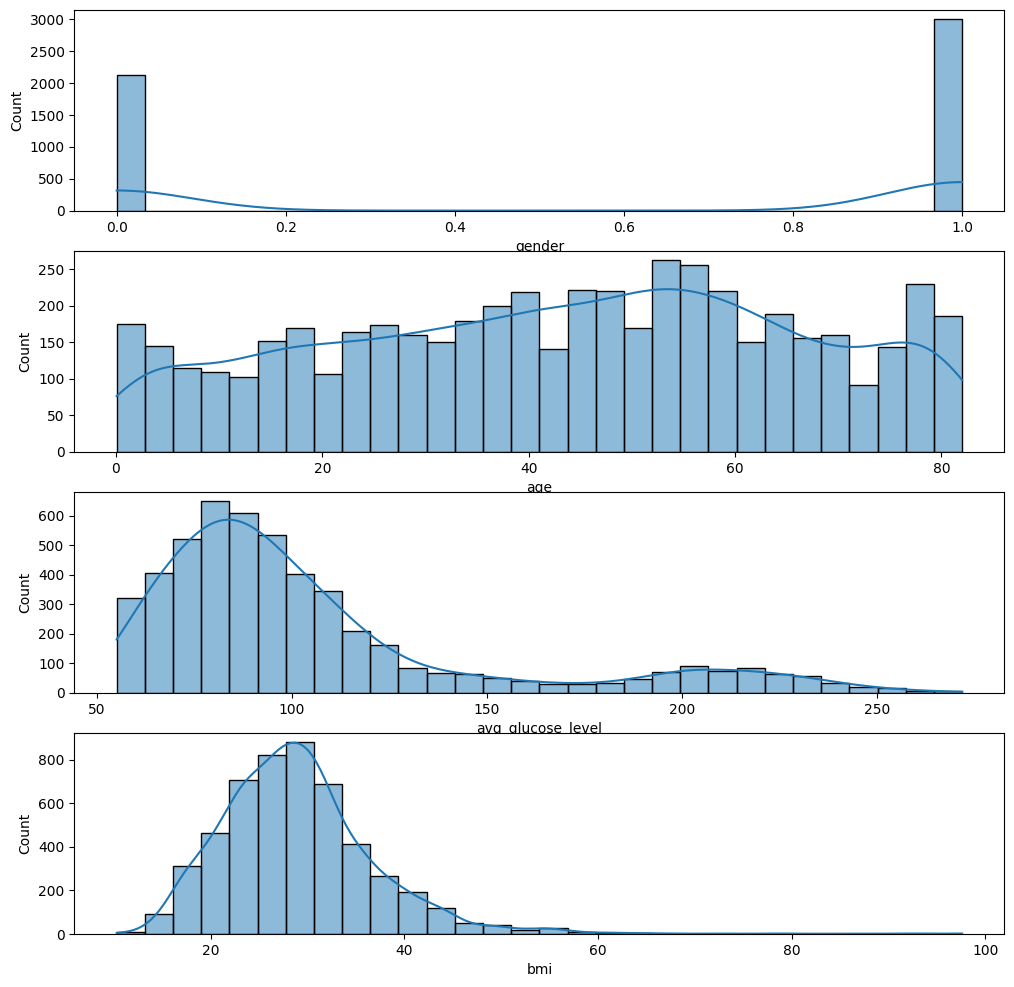

In [55]:
plt.figure(figsize=(12,12))
for i,col in enumerate(df.select_dtypes(float).columns):
    plt.subplot(4,1,i+1)
    sns.histplot(data=df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
for col in ['age','avg_glucose_level','bmi']:
    scaler.fit(df[[col]])
    df[col]=scaler.transform(df[[col]])

In [58]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,0.0,1.051434,0,1,1,0,0,2.706375,0.996452,2,1,old
1,1.0,0.786070,0,0,1,1,1,2.121559,0.114247,0,1,old
2,0.0,1.626390,0,1,1,0,1,-0.005028,0.465254,0,1,old
3,1.0,0.255342,0,0,1,0,0,1.437358,0.711419,3,1,child
4,1.0,1.582163,1,0,1,1,1,1.501184,-0.636011,0,1,old
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,1.626390,1,0,1,0,0,-0.494658,0.114247,0,0,old
5106,1.0,1.670617,0,0,1,1,0,0.420775,1.436958,0,0,old
5107,1.0,-0.363842,0,0,1,1,1,-0.511443,0.219089,0,0,adult
5108,0.0,0.343796,0,0,1,0,1,1.328257,-0.428714,2,0,child


In [59]:
df['age_cat']= df['age_cat'].map({'adult':0, 'old':1, 'child':2})

In [60]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,0.0,1.051434,0,1,1,0,0,2.706375,0.996452,2,1,1
1,1.0,0.786070,0,0,1,1,1,2.121559,0.114247,0,1,1
2,0.0,1.626390,0,1,1,0,1,-0.005028,0.465254,0,1,1
3,1.0,0.255342,0,0,1,0,0,1.437358,0.711419,3,1,2
4,1.0,1.582163,1,0,1,1,1,1.501184,-0.636011,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,1.626390,1,0,1,0,0,-0.494658,0.114247,0,0,1
5106,1.0,1.670617,0,0,1,1,0,0.420775,1.436958,0,0,1
5107,1.0,-0.363842,0,0,1,1,1,-0.511443,0.219089,0,0,0
5108,0.0,0.343796,0,0,1,0,1,1.328257,-0.428714,2,0,2


In [61]:
df= df.drop('age', axis=1)

In [62]:
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,0.0,0,1,1,0,0,2.706375,0.996452,2,1,1
1,1.0,0,0,1,1,1,2.121559,0.114247,0,1,1
2,0.0,0,1,1,0,1,-0.005028,0.465254,0,1,1
3,1.0,0,0,1,0,0,1.437358,0.711419,3,1,2
4,1.0,1,0,1,1,1,1.501184,-0.636011,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,1,0,1,0,0,-0.494658,0.114247,0,0,1
5106,1.0,0,0,1,1,0,0.420775,1.436958,0,0,1
5107,1.0,0,0,1,1,1,-0.511443,0.219089,0,0,0
5108,0.0,0,0,1,0,1,1.328257,-0.428714,2,0,2


In [63]:
from sklearn.model_selection import train_test_split

In [137]:
X = df.drop(columns="stroke")
y = df["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8,shuffle=True)

In [78]:
X

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_cat
0,0.0,0,1,1,0,0,2.706375,0.996452,2,1
1,1.0,0,0,1,1,1,2.121559,0.114247,0,1
2,0.0,0,1,1,0,1,-0.005028,0.465254,0,1
3,1.0,0,0,1,0,0,1.437358,0.711419,3,2
4,1.0,1,0,1,1,1,1.501184,-0.636011,0,1
...,...,...,...,...,...,...,...,...,...,...
5105,1.0,1,0,1,0,0,-0.494658,0.114247,0,1
5106,1.0,0,0,1,1,0,0.420775,1.436958,0,1
5107,1.0,0,0,1,1,1,-0.511443,0.219089,0,0
5108,0.0,0,0,1,0,1,1.328257,-0.428714,2,2


In [66]:
X_train

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_cat
3029,1.0,0,0,1,0,1,-0.858181,1.009408,2,0
2277,1.0,0,0,1,0,1,-0.499517,2.538223,2,0
3002,0.0,0,0,1,0,1,-0.905222,0.245001,0,1
246,1.0,0,0,1,1,1,-0.603980,0.050660,2,1
2825,0.0,0,0,1,0,0,-1.048997,-0.428714,3,1
...,...,...,...,...,...,...,...,...,...,...
4931,1.0,1,0,1,2,1,-0.166471,1.281485,3,2
3264,1.0,0,0,1,0,1,-0.753938,-0.376890,2,1
1653,0.0,0,0,1,0,1,-0.252604,-0.065945,3,2
2607,0.0,0,0,0,0,0,0.326692,0.102484,2,0


In [79]:
X_train.isna().sum()

gender               0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
age_cat              0
dtype: int64

In [71]:
X.isna().sum()

gender               1
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
age_cat              0
dtype: int64

In [72]:
df['gender'].value_counts()

gender
1.0    2994
0.0    2115
Name: count, dtype: int64

In [73]:
df[df['gender'].isna()]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
3116,NaN,0,0,0,0,1,0.82118,-0.843308,2,0,0


In [74]:
df['gender'].fillna(0,inplace=True)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [138]:
lg= LogisticRegression(random_state=7)
rf= RandomForestClassifier(n_estimators=30,max_leaf_nodes=900,max_features=0.8,criterion="entropy")
xgb = XGBClassifier(objective="binary:logistic",eval_metric = "auc")
gbc= GradientBoostingClassifier(max_depth=29,min_samples_leaf=4,min_samples_split=13,subsample=0.8)

In [139]:
lg.fit(X_train,y_train)
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=29, min_samples_leaf=4,
                           min_samples_split=13, subsample=0.8)

In [140]:
print("Logistic regression: ",lg.score(X_test,y_test))
print("Random Forests: ",rf.score(X_test,y_test))
print("XGBoost: ",xgb.score(X_test,y_test))
print("Gradient Boosting: ",gbc.score(X_test,y_test))


Logistic regression:  0.9549902152641878
Random Forests:  0.9549902152641878
XGBoost:  0.9569471624266145
Gradient Boosting:  0.9510763209393346


In [142]:
from sklearn.model_selection import cross_val_score

In [141]:
models = [lg,rf,xgb,gbc]

In [144]:
print("scores of each model using kfold validation: ")
for model in models:
    score = cross_val_score(model,X,y,cv=5)
    avg = np.mean(score)
    model_name = type(model).__name__
    print(f"scores for {model_name}: {score}")
    print(f"average score for {model_name}: {avg}\n")

scores of each model using kfold validation: 
scores for LogisticRegression: [0.95107632 0.94911937 0.95107632 0.95107632 0.95303327]
average score for LogisticRegression: 0.9510763209393346

scores for RandomForestClassifier: [0.94911937 0.94618395 0.94911937 0.95009785 0.94716243]
average score for RandomForestClassifier: 0.9483365949119374

scores for XGBClassifier: [0.94520548 0.94520548 0.93835616 0.94716243 0.94227006]
average score for XGBClassifier: 0.9436399217221135

scores for GradientBoostingClassifier: [0.94911937 0.94129159 0.94227006 0.94716243 0.94129159]
average score for GradientBoostingClassifier: 0.9442270058708415



In [145]:
from sklearn.metrics import confusion_matrix

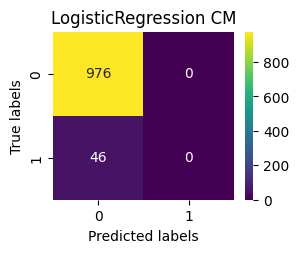

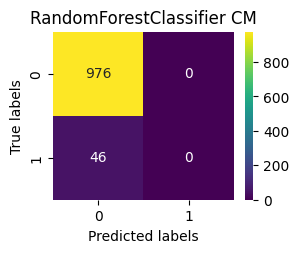

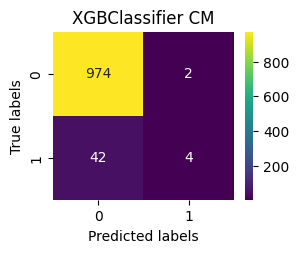

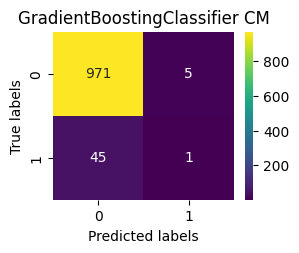

In [200]:
for i, model in enumerate(models):
    model_name = type(model).__name__
    plt.subplot(2,2,i+1)
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True,fmt='d', cmap="viridis")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f"{model_name} CM")
    plt.show()

In [150]:
X_train[0:10]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_cat
135,1.0,0,0,1,2,0,3.471187,1.268529,0,1
1275,1.0,0,0,1,0,1,0.773034,-0.040033,0,0
860,1.0,0,0,1,0,1,-0.132460,2.771432,3,2
419,1.0,0,0,0,0,0,-0.189882,-0.350978,0,0
4127,0.0,0,0,1,2,1,-0.573060,0.257957,0,0
3995,0.0,0,0,1,0,1,-0.232506,0.076572,3,2
2045,0.0,0,0,0,3,1,-0.432378,-1.413375,1,2
3632,1.0,0,0,0,1,1,-0.834770,0.322737,1,1
710,1.0,0,0,1,1,1,0.567642,-0.389846,1,1
198,0.0,0,0,1,0,1,0.190426,0.146690,2,1


In [190]:
Xt= X_train.to_numpy()
yte= y_train.to_numpy()

In [167]:
Xt

array([[ 1.        ,  0.        ,  0.        , ...,  1.26852931,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.0400325 ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  2.77143199,
         3.        ,  2.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.61009904,
         3.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        , ..., -1.51702306,
         0.        ,  2.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.19317653,
         2.        ,  2.        ]])

In [168]:
Xt[0]


array([1.        , 0.        , 0.        , 1.        , 2.        ,
       0.        , 3.47118697, 1.26852931, 0.        , 1.        ])

In [191]:
yt= rf.predict(Xt[0].reshape(1,-1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [192]:
yt

array([1])

In [193]:
number = yt.item()

In [188]:
number

1

In [194]:
yte[0]

1